# India -Trending YouTube Video -(EDA)

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos. 
YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). 

We will analyze this data to get insights into India-YouTube trending videos, to see what is common between these videos. Those insights might also be used by people who want to increase popularity of their videos on YouTube.

#### Import Library

In [301]:
import string
import calendar 
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns
from  nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re

#### Reading dataset

In [302]:
df_ind = pd.read_csv('../input/youtube-new/INvideos.csv')

#### First 5 Records

In [303]:
df_ind.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


#### Information about dataset (the data type of each column)

In [304]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

As we can see above, the dataset contain categorical, numarical and boolean values.
We can see that there are 37,352  entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 37,352  non-null entries) except description column which has some null values; it only has 36,791  non-null values.

#### Statistic Description of Dataset

In [305]:
df_ind.describe() 

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


We can see above minimum views of video is 4,024 and maximum views are 12,54,322, so on for likes, dislikes and comment_count.
We can see the average views of video is  3,04,586

#### Statistic Description of Categorical Variable

In [306]:
df_ind.describe(include = 'O')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,36791
unique,16307,205,16721,1426,16339,12578,16523,13992
top,#NAME?,17.01.12,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,511,200,19,284,18,1381,16,166


We can see there are 205 unique dates, which means our dataset contain trending videos of 205 days.
From video_id description, we can see that there are 37352 entries as we expected because our dataset contains 37352 entries. But we can see thos, that means some videos are appeared on trending videos more than 1 day.

We can also see the top frequent title is 'Mission: Impossible - Fallout (2018) - Officia...' and this title also appeared 19 times on trending video list.

We can also see there is 16307 unique videos and we expected title should be 16307. but here title is 16721, we assumed that the each ID is correspondence to title. 
We can interpret that when trending video is appeared on trending list, on another day when it again  appeared but with modified title.

For publish_time, unique values are less than 16721, because there may be some trending video appeared on same time.

## Exploratory Data Analysis

#### Dataset Collected Years

In [307]:
df_ind['trending_date'] = pd.to_datetime(df_ind['trending_date'], format='%y.%d.%m')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


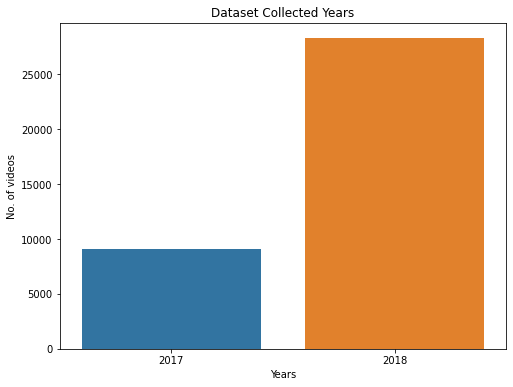

In [308]:
df_ind['year'] = df_ind['trending_date'].dt.year
plt.figure(figsize=(8,6))
sns.countplot(df_ind['year'])
plt.title('Dataset Collected Years')
plt.xlabel('Years')
plt.ylabel('No. of videos')
plt.show()

In [309]:
df_ind['year'].value_counts() / df_ind['year'].count()*100

2018    75.746948
2017    24.253052
Name: year, dtype: float64

We can see that the dataset was collected in 2017 and 2018 with 75.75% of it in 2018 and 24.25% in 2017.

#### Trending Videos Month

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


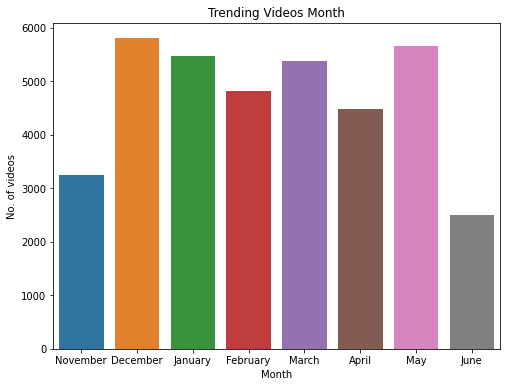

Trending Videos in Month

December    5803
May         5656
January     5464
March       5369
February    4818
April       4479
November    3256
June        2507
Name: month, dtype: int64


In [310]:
df_ind['month'] = df_ind['trending_date'].dt.month
df_ind['month'] = df_ind['month'].apply(lambda x: calendar.month_name[x])
plt.figure(figsize=(8,6))
sns.countplot(df_ind['month'])
plt.title('Trending Videos Month')
plt.xlabel('Month')
plt.ylabel('No. of videos')
plt.show()
print("Trending Videos in Month\n")
print(df_ind['month'].value_counts())

#### Trending Videos Day

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


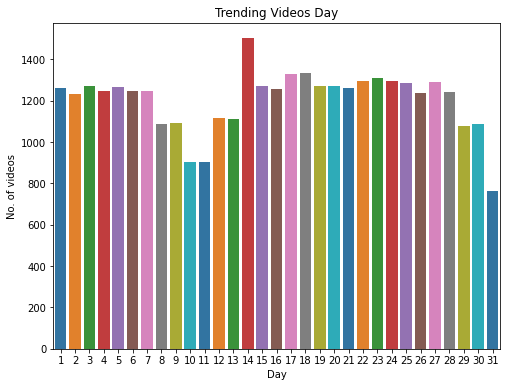

Trending Videos in Day

14    1502
18    1333
17    1329
23    1309
24    1297
22    1296
27    1288
25    1285
20    1273
15    1273
3     1271
19    1269
5     1264
1     1260
21    1259
16    1256
4     1247
7     1245
6     1245
28    1244
26    1235
2     1231
12    1116
13    1111
9     1093
30    1089
8     1087
29    1076
11     905
10     903
31     761
Name: day, dtype: int64


In [311]:
df_ind['day'] = df_ind['trending_date'].dt.day
plt.figure(figsize=(8,6))
sns.countplot(df_ind['day'],palette=sns.color_palette())
plt.title('Trending Videos Day')
plt.xlabel('Day')
plt.ylabel('No. of videos')
plt.show()
print("Trending Videos in Day\n")
print(df_ind['day'].value_counts())

#### Trending Videos Publishing Time

 #### Publishing Month

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


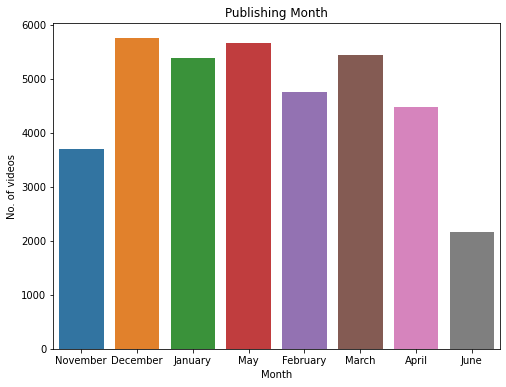

Publishing Month

December    5754
May         5666
March       5436
January     5389
February    4766
April       4474
November    3703
June        2164
Name: pub_month, dtype: int64


In [312]:
df_ind['publish_time'] = pd.to_datetime(df_ind['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_ind['pub_month'] = df_ind['publish_time'].dt.month
df_ind['pub_month'] = df_ind['pub_month'].apply(lambda x: calendar.month_name[x])
plt.figure(figsize=(8,6))
sns.countplot(df_ind['pub_month'])
plt.title('Publishing Month')
plt.xlabel('Month')
plt.ylabel('No. of videos')
plt.show()
print("Publishing Month\n")
print(df_ind['pub_month'].value_counts())

#### Publishing Day

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


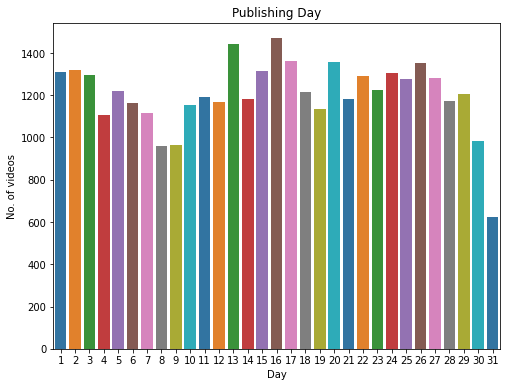

Publishing Day

16    1470
13    1443
17    1364
20    1358
26    1354
2     1321
15    1313
1     1312
24    1303
3     1296
22    1292
27    1280
25    1277
23    1223
5     1220
18    1214
29    1205
11    1192
14    1183
21    1180
28    1174
12    1166
6     1165
10    1156
19    1136
7     1115
4     1108
30     984
9      964
8      961
31     623
Name: pub_day, dtype: int64


In [313]:
df_ind['pub_day'] = df_ind['publish_time'].dt.day
plt.figure(figsize=(8,6))
sns.countplot(df_ind['pub_day'],palette=sns.color_palette())
plt.title('Publishing Day')
plt.xlabel('Day')
plt.ylabel('No. of videos')
plt.show()
print("Publishing Day\n")
print(df_ind['pub_day'].value_counts())

#### Publishing Week Day

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


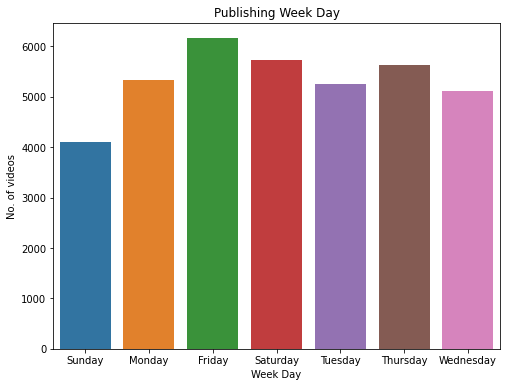

Publishing Week Day

Friday       6163
Saturday     5730
Thursday     5636
Monday       5338
Tuesday      5255
Wednesday    5122
Sunday       4108
Name: pub_weekname, dtype: int64


In [314]:
df_ind['pub_weekname'] = df_ind['publish_time'].dt.day_name()
plt.figure(figsize=(8,6))
sns.countplot(df_ind['pub_weekname'])
plt.title('Publishing Week Day')
plt.xlabel('Week Day')
plt.ylabel('No. of videos')
plt.show()
print("Publishing Week Day\n")
print(df_ind['pub_weekname'].value_counts())

#### Publishing Hour

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


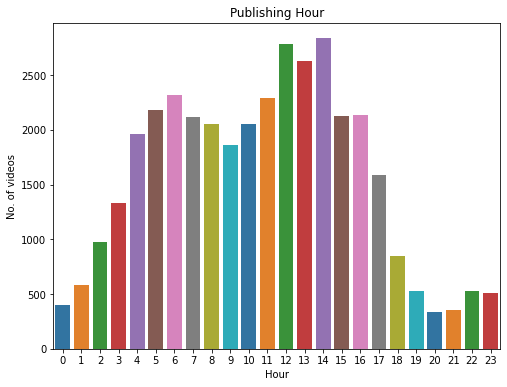

Publishing Hour

14    2838
12    2782
13    2631
6     2323
11    2295
5     2184
16    2134
15    2130
7     2119
10    2058
8     2051
4     1960
9     1863
17    1587
3     1330
2      978
18     849
1      585
22     531
19     524
23     506
0      400
21     359
20     335
Name: pub_hour, dtype: int64


In [315]:
df_ind['pub_hour'] = df_ind['publish_time'].dt.hour
plt.figure(figsize=(8,6))
sns.countplot(df_ind['pub_hour'],palette=sns.color_palette())
plt.title('Publishing Hour')
plt.xlabel('Hour')
plt.ylabel('No. of videos')
plt.show()
print("Publishing Hour\n")
print(df_ind['pub_hour'].value_counts())

#### Likes Rate by Month

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


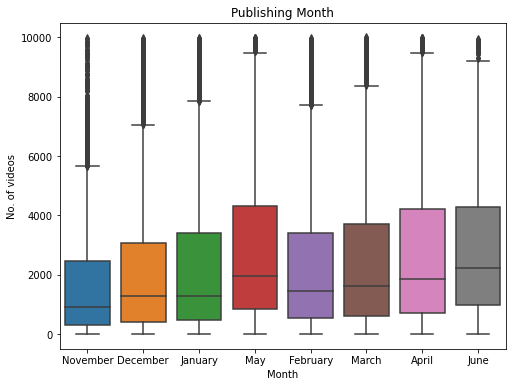

In [316]:
plt.figure(figsize=(8,6))
sns.boxplot(df_ind['pub_month'],df_ind[df_ind['likes']<1e4]['likes'])
plt.title('Publishing Month')
plt.xlabel('Month')
plt.ylabel('No. of videos')
plt.show()

#### Likes Rate by Day

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


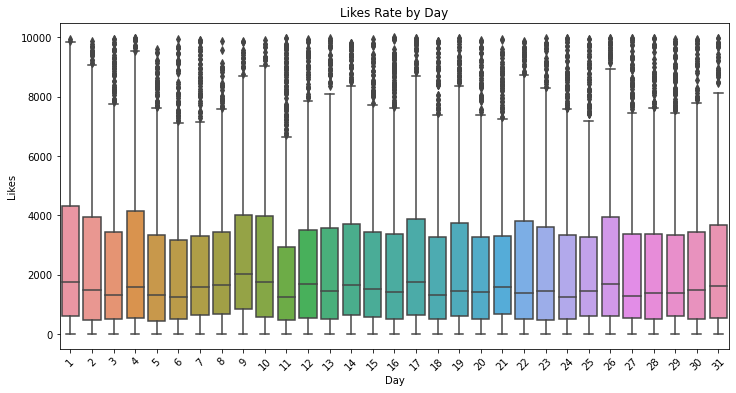

In [317]:
plt.figure(figsize=(12,6))
sns.boxplot(df_ind['pub_day'],df_ind[df_ind['likes']<1e4]['likes'])
plt.title('Likes Rate by Day')
plt.xlabel('Day')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

#### Likes Rate by Hour

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


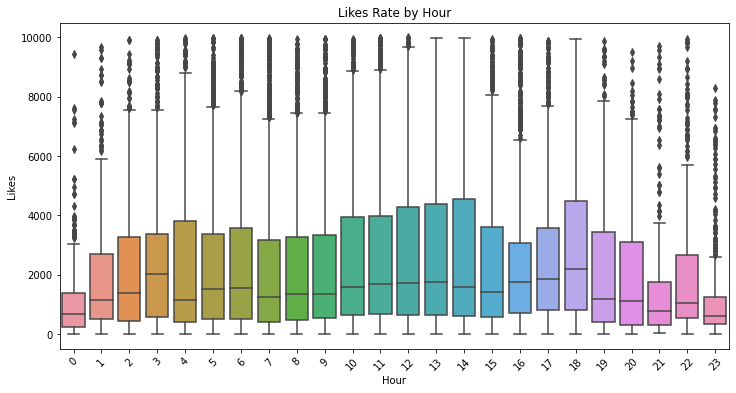

In [318]:
plt.figure(figsize=(12,6))
sns.boxplot(df_ind['pub_hour'],df_ind[df_ind['likes']<1e4]['likes'])
plt.title('Likes Rate by Hour')
plt.xlabel('Hour')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

#### **Distribution of Numerical features**

#### Explore the insights from Likes

**Distribution of Likes**

<Figure size 864x720 with 0 Axes>

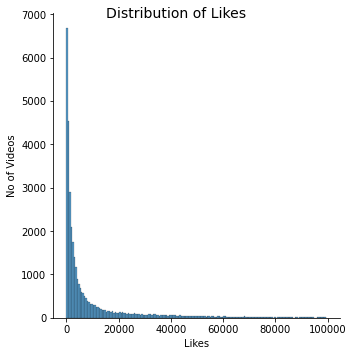

In [319]:
plt.figure(figsize=(12,10))
distr_likes = sns.displot(df_ind[df_ind['likes']<1e5]['likes'])
distr_likes.fig.suptitle("Distribution of Likes", fontsize=14)   
plt.xlabel('Likes')
plt.ylabel("No of Videos")
plt.show()

We can see most of the trending videos have likes 20,000 or less. Lets see percentage of videos for 20,000 likes.

**Percentage of Videos**

In [320]:
df_ind[df_ind['likes'] < 2e4]['likes'].count() / df_ind['likes'].count() * 100

79.32105375883486

We can see that the percentage of videos with less than 20,000 likes is around 79%. Similarly  for percentage of videos with less than 10,0000 likes is around 94%.

**Quantile**

In [321]:
print("Likes quantiles")
print(df_ind['likes'].quantile([.01,.25,.5,.75,.99]))

Likes quantiles
0.01         0.00
0.25       864.00
0.50      3069.00
0.75     13774.25
0.99    432675.00
Name: likes, dtype: float64


#### Explore the insights from Dislikes

**Distribution of Dislikes**

<Figure size 864x720 with 0 Axes>

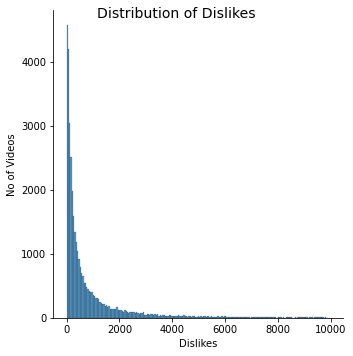

In [322]:
plt.figure(figsize=(12,10))
distr_likes = sns.displot(df_ind[df_ind['dislikes']<1e4]['dislikes'])
distr_likes.fig.suptitle("Distribution of Dislikes", fontsize=14)   
plt.xlabel('Dislikes')
plt.ylabel("No of Videos")
plt.show()

We can see most of the trending videos have dislikes 2,000 or less. Lets see the percentage of videos for 2000 dislikes

**Percentage of Videos**

In [323]:
df_ind[df_ind['dislikes'] <2e3]['dislikes'].count() / df_ind['dislikes'].count() * 100

85.85885628614264

We can see that the percentage of videos with less than 2,000 likes is around 85 %. Similarly for percentage of videos with less than 10,000 likes is around 97 %.

**Quantile**

In [324]:
print('Dislike Quantile')
print(df_ind['dislikes'].quantile([.01,.25,.50,.75,.99]))

Dislike Quantile
0.01        0.00
0.25      108.00
0.50      326.00
0.75     1019.25
0.99    21373.36
Name: dislikes, dtype: float64


#### Explore the insights from Views

**Distribution of Views**

Text(-2.575000000000003, 0.5, 'No of Videos')

<Figure size 864x720 with 0 Axes>

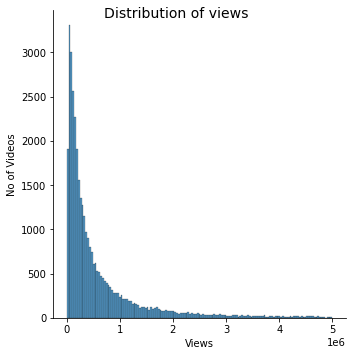

In [325]:
plt.figure(figsize=(12,10))
distr_likes = sns.displot(df_ind[df_ind['views']<5e6]['views'])
distr_likes.fig.suptitle("Distribution of views", fontsize=14)   
plt.xlabel('Views')
plt.ylabel("No of Videos")

We can see most of the trending videos have views 1 million or less. Lets see the percentage of videos with 1 million views

**Percentage of videos**

In [326]:
df_ind[df_ind['views'] < 1e6]['views'].count() / df_ind['views'].count() * 100

79.56735917755408

We can see that the percentage of videos with less than 1 million views is around 79 %. Similarly for percentage of videos with less than 5 millions views is around 95 %.

**Quantile**

In [327]:
print('Views Quantile')
print(df_ind['views'].quantile([.01,.25,.5,.75,.99]))

Views Quantile
0.01       18801.51
0.25      123915.50
0.50      304586.00
0.75      799291.25
0.99    13305944.98
Name: views, dtype: float64


#### Explore the insights from comment_count

**Distribution of comment_count**

Text(-2.450000000000003, 0.5, 'No of Videos')

<Figure size 864x720 with 0 Axes>

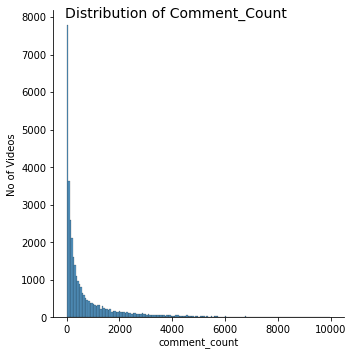

In [328]:
plt.figure(figsize=(12,10))
distr_likes = sns.displot(df_ind[df_ind['comment_count']<1e4]['comment_count'])
distr_likes.fig.suptitle("Distribution of Comment_Count", fontsize=14)   
plt.xlabel('comment_count')
plt.ylabel("No of Videos")   

We can see most of the comments count is 2k or less. Lets see the percentage of the videos with 2k comments count.

**Percentage of videos**

In [329]:
df_ind[df_ind['comment_count'] < 2e3]['comment_count'].count() / df_ind['comment_count'].count() * 100

81.55118869136861


We can see percentage of videos with 2k comment_count is around 81 %. Similarly percentage of videos with 20k comment_count is around 97 %.

**Quantile**

In [330]:
print('Comment_Count Quantile')
print(df_ind['comment_count'].quantile([.01,.25,.50,.75,.99]))

Comment_Count Quantile
0.01        0.00
0.25       81.00
0.50      329.00
0.75     1285.00
0.99    42380.28
Name: comment_count, dtype: float64


#### Distribution of Boolean features

**Comments Disabled**

In [331]:
df_ind['comments_disabled'].value_counts()

False    36148
True      1204
Name: comments_disabled, dtype: int64

We see that only 1204 of trending videos have make there comment section off for users.

**Ratings Disabled**

In [332]:
df_ind['ratings_disabled'].value_counts()

False    36571
True       781
Name: ratings_disabled, dtype: int64

We can see that only 781 trending videos  have disable there ratings.

**Videos Error**

In [333]:
 df_ind['video_error_or_removed'].value_counts()

False    37341
True        11
Name: video_error_or_removed, dtype: int64

We can see that  23 trending videos have  errors out of 37352 videos .

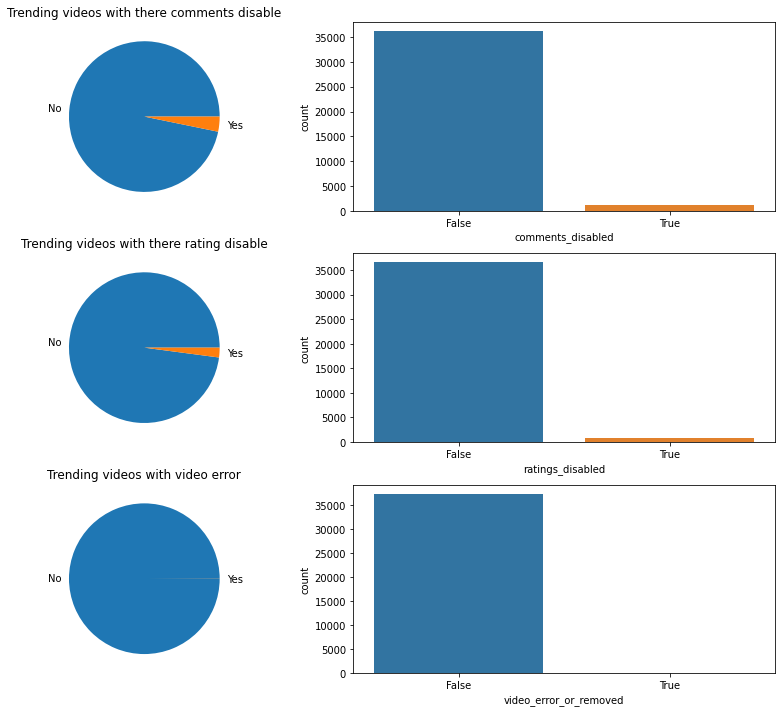

In [334]:
plt.figure(figsize=(12, 10))

plt.subplot(321)
plt.title('Trending videos with there comments disable')
value_count_com = df_ind['comments_disabled'].value_counts().to_dict()
plt.pie([value_count_com[False], value_count_com[True]],labels=['No', 'Yes'])

plt.subplot(322)
sns.countplot(x=df_ind['comments_disabled'])

plt.subplot(323)
plt.title('Trending videos with there rating disable')
value_count_rat = df_ind['ratings_disabled'].value_counts().to_dict()
plt.pie([value_count_rat[False], value_count_rat[True]],labels=['No', 'Yes'])

plt.subplot(324)
sns.countplot(x=df_ind['ratings_disabled'])

plt.subplot(325)
plt.title('Trending videos with video error')
value_count_vid = df_ind['video_error_or_removed'].value_counts().to_dict()
plt.pie([value_count_vid[False], value_count_vid[True]],labels=['No', 'Yes'])

plt.subplot(326)
sns.countplot(x=df_ind['video_error_or_removed'])

plt.tight_layout()
plt.show()

#### Views, Likes, Dislikes Distribuition by Category

In [335]:
df_ind['category'] = np.nan
df_ind.loc[(df_ind["category_id"] == 1),"category"] = 'Film and Animation'
df_ind.loc[(df_ind["category_id"] == 2),"category"] = 'Cars and Vehicles'
df_ind.loc[(df_ind["category_id"] == 10),"category"] = 'Music'
df_ind.loc[(df_ind["category_id"] == 15),"category"] = 'Pets and Animals'
df_ind.loc[(df_ind["category_id"] == 17),"category"] = 'Sport'
df_ind.loc[(df_ind["category_id"] == 19),"category"] = 'Travel and Events'
df_ind.loc[(df_ind["category_id"] == 20),"category"] = 'Gaming'
df_ind.loc[(df_ind["category_id"] == 22),"category"] = 'People and Blogs'
df_ind.loc[(df_ind["category_id"] == 23),"category"] = 'Comedy'
df_ind.loc[(df_ind["category_id"] == 24),"category"] = 'Entertainment'
df_ind.loc[(df_ind["category_id"] == 25),"category"] = 'News and Politics'
df_ind.loc[(df_ind["category_id"] == 26),"category"] = 'How to and Style'
df_ind.loc[(df_ind["category_id"] == 27),"category"] = 'Education'
df_ind.loc[(df_ind["category_id"] == 28),"category"] = 'Science and Technology'
df_ind.loc[(df_ind["category_id"] == 29),"category"] = 'Non Profits and Activism'
df_ind.loc[(df_ind["category_id"] == 25),"category"] = 'News & Politics'

#### Video Category with the Largest Number of Trending Videos

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


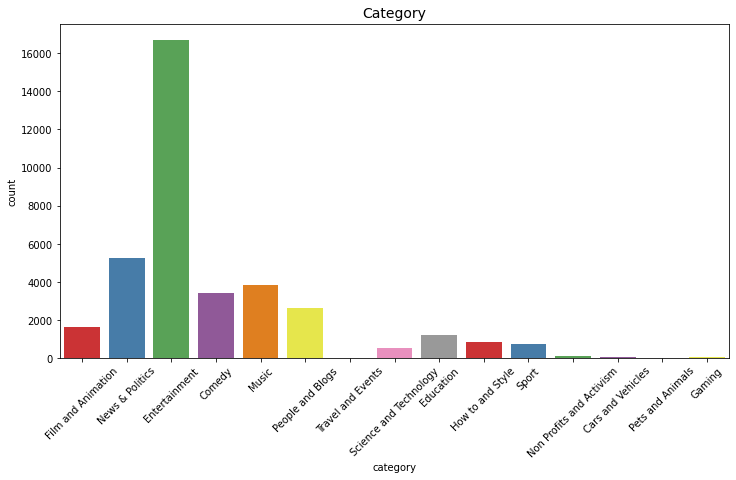

Category

Entertainment               16712
News & Politics              5241
Music                        3858
Comedy                       3429
People and Blogs             2624
Film and Animation           1658
Education                    1227
How to and Style              845
Sport                         731
Science and Technology        552
Non Profits and Activism      105
Cars and Vehicles              72
Gaming                         66
Travel and Events               8
Pets and Animals                3
Name: category, dtype: int64


In [336]:
plt.figure(figsize = (12,6))
s = sns.countplot(df_ind['category'], palette="Set1")
plt.xticks(rotation=45)
plt.title('Category', fontsize=14)
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.show()
print('Category\n')
print(df_ind['category'].value_counts())

We can see most of the trending videos from Entertainment category followed by News and Politics and so on. Most least trending videos from Pets and Animals category followed by Travel and Events and so on.

#### Views Distribuition by Category

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


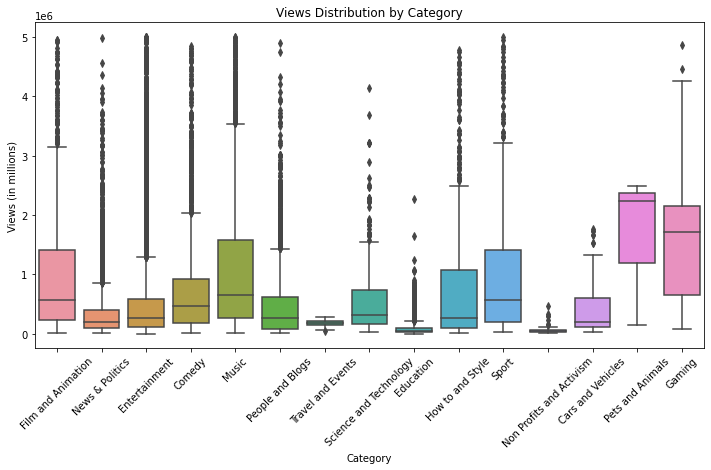

In [337]:
df_ind['view'] = df_ind[df_ind['views']<5e6]['views']
plt.figure(figsize=(12,6))
sns.boxplot(df_ind['category'],df_ind['view'])
plt.title('Views Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Views (in millions)')
plt.xticks(rotation=45)
plt.show()

#### Likes Distribuition by Category

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


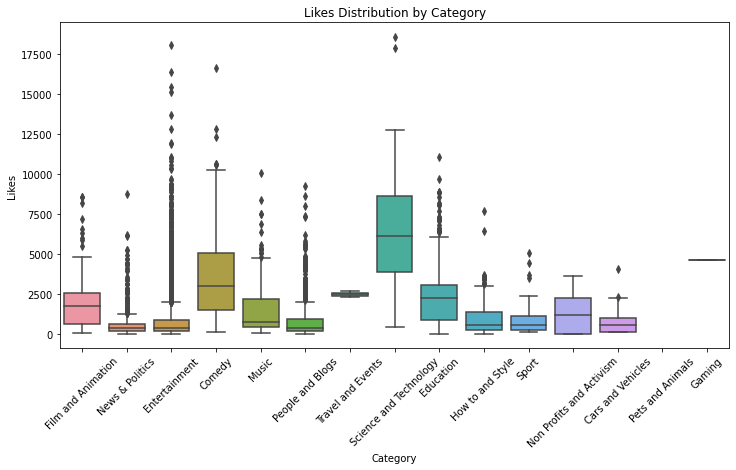

In [338]:
df_ind['like'] = df_ind[df_ind['views']<1e5]['likes']
plt.figure(figsize=(12,6))
sns.boxplot(df_ind['category'],df_ind['like'])
plt.title('Likes Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

#### Dislikes Distribuition by Category

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


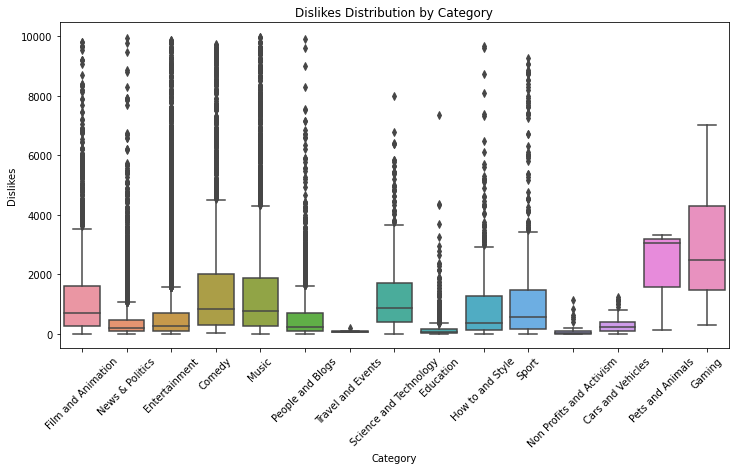

In [339]:
df_ind['dislike'] = df_ind[df_ind['dislikes']<1e4]['dislikes']
plt.figure(figsize=(12,6))
sns.boxplot(df_ind['category'],df_ind['dislike'])
plt.title('Dislikes Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Dislikes')
plt.xticks(rotation=45)
plt.show()

#### Comments Distribution by Category

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


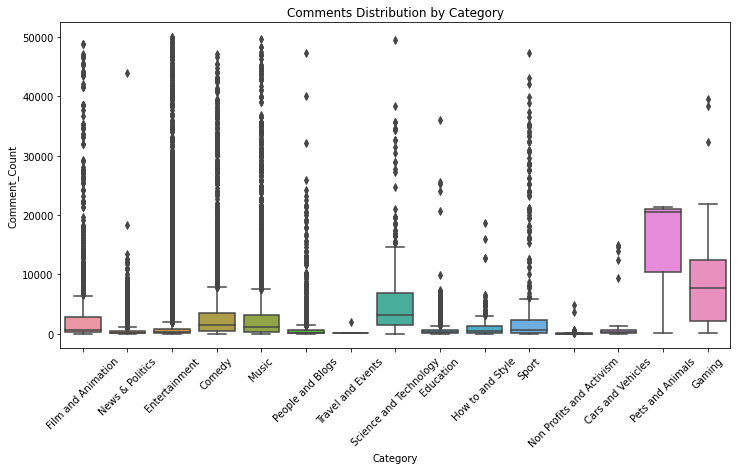

In [340]:
df_ind['comment_counts'] = df_ind[df_ind['comment_count']<5e4]['comment_count']
plt.figure(figsize=(12,6))
sns.boxplot(df_ind['category'],df_ind['comment_counts'])
plt.title('Comments Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Comment_Count')
plt.xticks(rotation=45)
plt.show()

#### Videos Title Lengths

Let's see the length of each video title to get an idea about the lengths of trending video titles.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


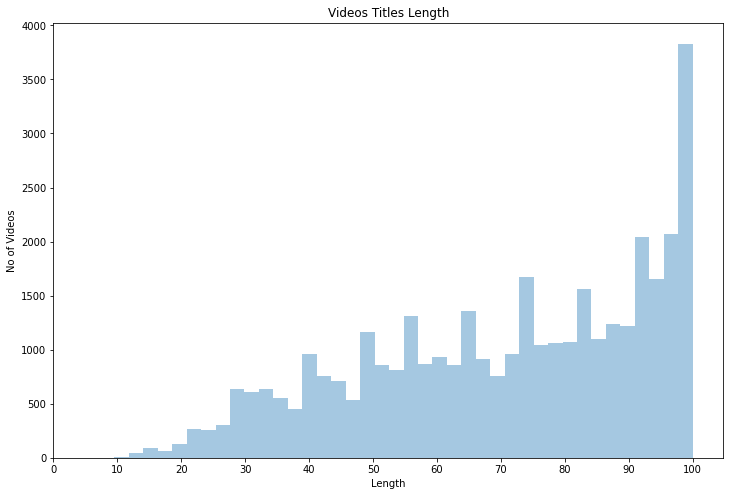

In [341]:
plt.figure(figsize=(12,8))
df_ind['title_len'] = df_ind['title'].apply(lambda a : len(a))
sns.distplot(df_ind['title_len'], kde=False)
plt.title('Videos Titles Length')
plt.xlabel('Length')
plt.xticks(range(0, 110, 10))
plt.ylabel('No of Videos')
plt.show()

We can see that title-length distribution, where most videos have title lengths between 70 and 100 character.

#### Most common words in Video Titles

In [342]:
common_words = df_ind["title"].apply(lambda a: a.split())
common_words = [x for y in common_words for x in y]
Counter(common_words).most_common(20)

[('|', 41986),
 ('-', 15777),
 ('2018', 6790),
 ('Episode', 4162),
 ('||', 3713),
 ('Full', 1940),
 ('The', 1890),
 ('Movie', 1854),
 ('Song', 1836),
 ('2017', 1693),
 ('Telugu', 1676),
 ('News', 1613),
 ('&', 1601),
 ('Video', 1594),
 ('Latest', 1437),
 ('Official', 1392),
 ('Trailer', 1306),
 ('to', 1306),
 (':', 1293),
 ('in', 1248)]

#### Most common words in Tags

In [343]:
common_words = df_ind["tags"].apply(lambda a: a.split())
common_words = [x for y in common_words for x in y]
Counter(common_words).most_common(20)

[('in', 8350),
 ('new', 7274),
 ('latest', 6374),
 ('tv', 5527),
 ('movie', 5028),
 ('comedy', 4591),
 ('punjabi', 4481),
 ('Movie', 4102),
 ('news', 4025),
 ('songs', 3742),
 ('of', 3690),
 ('on', 3645),
 ('and', 3305),
 ('full', 3277),
 ('vs', 3190),
 ('to', 3082),
 ('funny', 2574),
 ('tamil', 2518),
 ('Latest', 2340),
 ('song', 2291)]

#### Most common words in Channel Title 

In [356]:
common_words = df_ind["channel_title"].apply(lambda a: a.split())
common_words = [x for y in common_words for x in y]
Counter(common_words).most_common(20)

[('tv', 2344),
 ('news', 2233),
 ('music', 1587),
 ('india', 1367),
 ('telugu', 1362),
 ('tamil', 1264),
 ('etv', 754),
 ('zee', 679),
 ('series', 627),
 ('media', 580),
 ('tv9', 578),
 ('movies', 492),
 ('entertainment', 475),
 ('records', 434),
 ('show', 386),
 ('channel', 379),
 ('flowers', 379),
 ('comedy', 376),
 ('manorama', 368),
 ('official', 365)]

#### Correlation

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

Let's see the correlation between variables.

<AxesSubplot:>

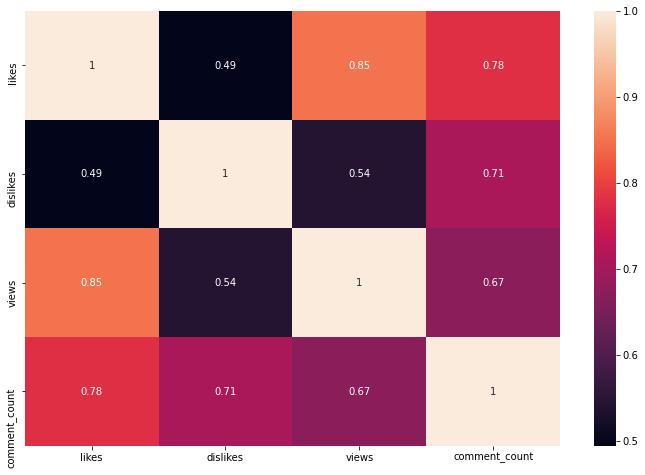

In [344]:
plt.figure(figsize = (12,8))
sns.heatmap(df_ind[['likes','dislikes','views','comment_count']].corr(),annot=True)

We can see  that views and likes are highly positively correlated with a correlation value of 0.85; we can see also a high positive correlation 0.80 between likes and comment count, and between dislikes and comment count 0.70.

#### **Correlation between variables**

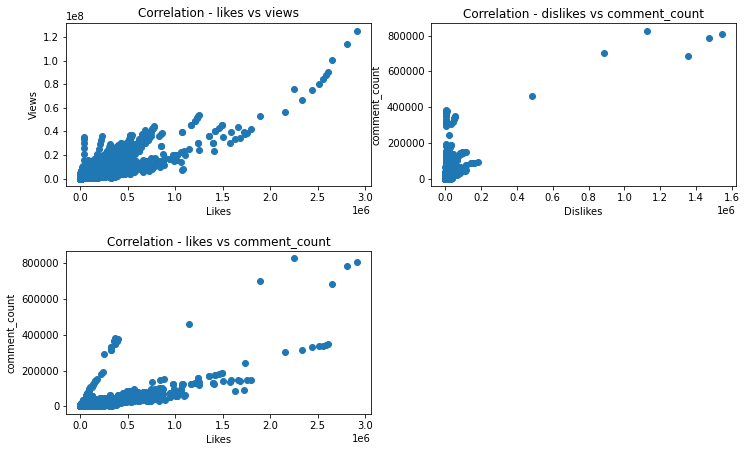

In [345]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.scatter(df_ind['likes'], df_ind['views'],edgecolors='face')
plt.title("Correlation - likes vs views")
plt.xlabel('Likes')
plt.ylabel('Views')

plt.subplot(2,2,2)
plt.scatter(df_ind['dislikes'], df_ind['comment_count'],edgecolors='face')
plt.title("Correlation - dislikes vs comment_count")
plt.xlabel('Dislikes')
plt.ylabel('comment_count')

plt.subplot(2,2,3)
plt.scatter(df_ind['likes'], df_ind['comment_count'],edgecolors='face')
plt.title("Correlation - likes vs comment_count")
plt.xlabel('Likes')
plt.ylabel('comment_count')
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.show()

#### Meta Features

In [346]:
# word_count
df_ind['word_count_title'] = df_ind['title'].apply(lambda x: len(str(x).split()))
df_ind['word_count_tags'] = df_ind['tags'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_ind['unique_word_count_title'] = df_ind['title'].apply(lambda x: len(set(str(x).split())))
df_ind['unique_word_count_tags'] = df_ind['tags'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_ind['stop_word_count_title'] = df_ind['title'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_ind['stop_word_count_tags'] = df_ind['tags'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

#upper case words count
df_ind["count_words_upper_title"] = df_ind["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_ind["count_words_upper_tags"] = df_ind["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# mean_word_length
df_ind['mean_word_length_title'] = df_ind['title'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_ind['mean_word_length_tags'] = df_ind['tags'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_ind['char_count_title'] = df_ind['title'].apply(lambda x: len(str(x)))
df_ind['char_count_tags'] = df_ind['tags'].apply(lambda x: len(str(x)))

# punctuation_count
df_ind['punctuation_count_title'] = df_ind['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_ind['punctuation_count_tags'] = df_ind['tags'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_ind['hashtag_count_title'] = df_ind['title'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_ind['hashtag_count_tags'] = df_ind['tags'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_ind['mention_count_title'] = df_ind['title'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_ind['mention_count_tags'] = df_ind['tags'].apply(lambda x: len([c for c in str(x) if c == '@']))

#### Title

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

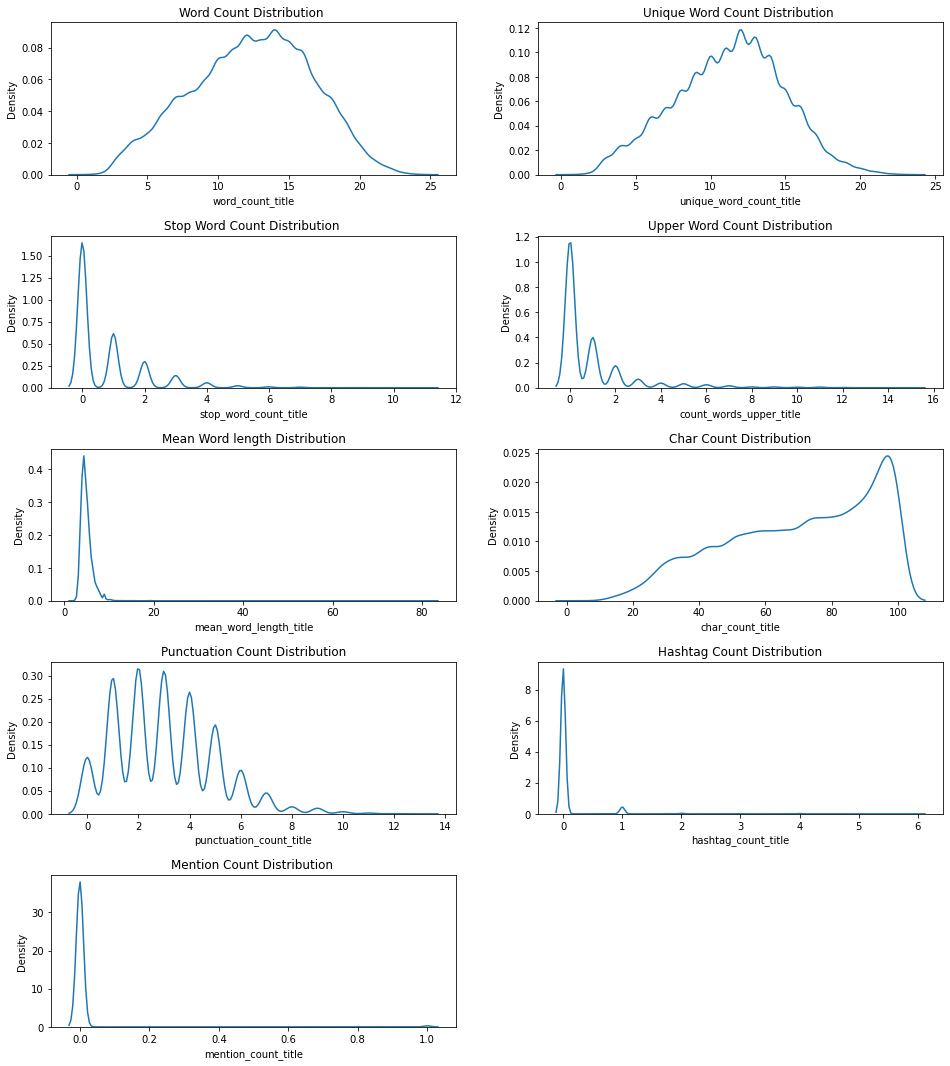

In [347]:
plt.figure(figsize=(16,18))
plt.subplot(521)
sns.distplot(df_ind['word_count_title'],hist=False)
plt.title('Word Count Distribution ')

plt.subplot(522)
sns.distplot(df_ind['unique_word_count_title'],hist=False)
plt.title('Unique Word Count Distribution ')

plt.subplot(523)
sns.distplot(df_ind['stop_word_count_title'],hist=False)
plt.title('Stop Word Count Distribution ')

plt.subplot(524)
sns.distplot(df_ind["count_words_upper_title"],hist=False)
plt.title('Upper Word Count Distribution')

plt.subplot(525)
sns.distplot(df_ind['mean_word_length_title'],hist=False)
plt.title('Mean Word length Distribution')

plt.subplot(526)
sns.distplot(df_ind['char_count_title'],hist=False)
plt.title('Char Count Distribution')

plt.subplot(527)
sns.distplot(df_ind['punctuation_count_title'],hist=False)
plt.title('Punctuation Count Distribution')

plt.subplot(528)
sns.distplot(df_ind['hashtag_count_title'],hist=False)
plt.title('Hashtag Count Distribution')

plt.subplot(529)
sns.distplot(df_ind['mention_count_title'],hist=False)
plt.title('Mention Count Distribution ')
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.show()

#### Tags

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

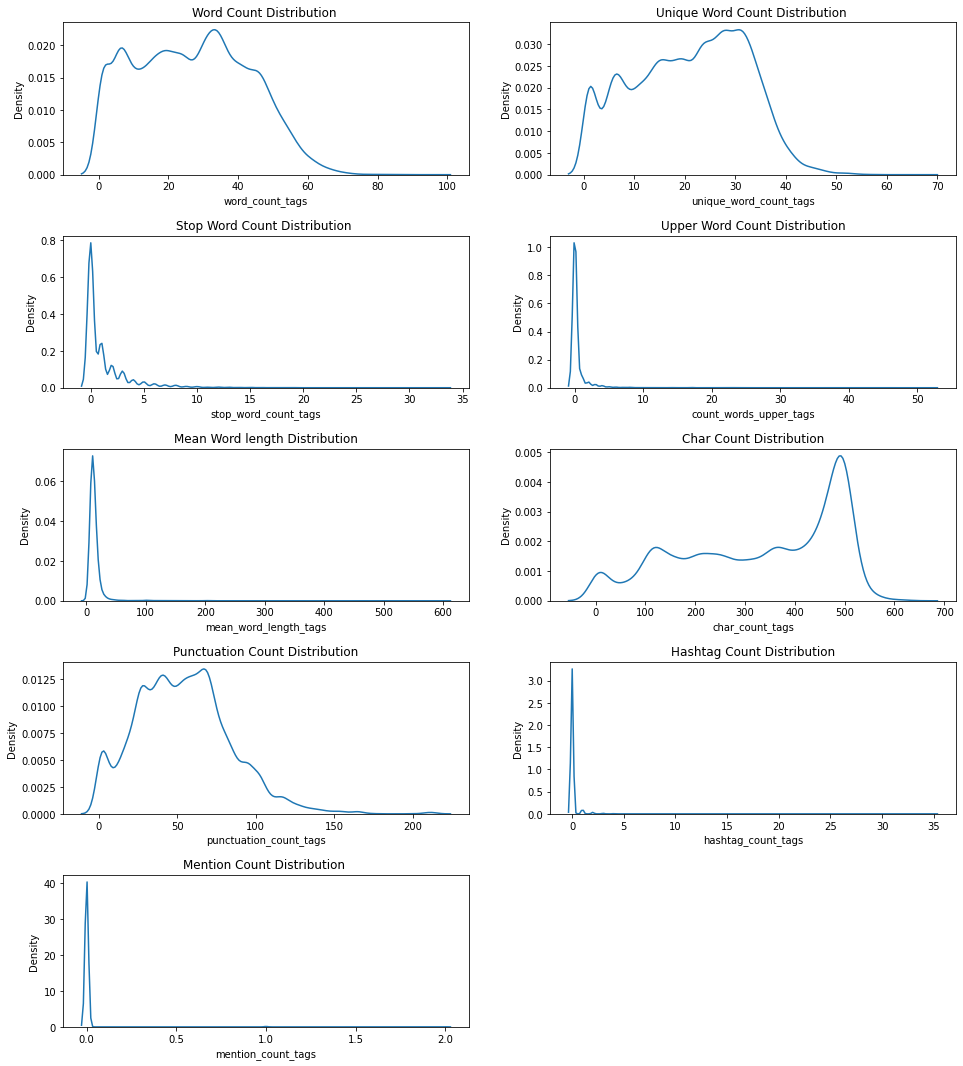

In [348]:
plt.figure(figsize=(16,18))
plt.subplot(521)
sns.distplot(df_ind['word_count_tags'],hist=False)
plt.title('Word Count Distribution ')

plt.subplot(522)
sns.distplot(df_ind['unique_word_count_tags'],hist=False)
plt.title('Unique Word Count Distribution ')

plt.subplot(523)
sns.distplot(df_ind['stop_word_count_tags'],hist=False)
plt.title('Stop Word Count Distribution ')

plt.subplot(524)
sns.distplot(df_ind["count_words_upper_tags"],hist=False)
plt.title('Upper Word Count Distribution')

plt.subplot(525)
sns.distplot(df_ind['mean_word_length_tags'],hist=False)
plt.title('Mean Word length Distribution')

plt.subplot(526)
sns.distplot(df_ind['char_count_tags'],hist=False)
plt.title('Char Count Distribution')

plt.subplot(527)
sns.distplot(df_ind['punctuation_count_tags'],hist=False)
plt.title('Punctuation Count Distribution')

plt.subplot(528)
sns.distplot(df_ind['hashtag_count_tags'],hist=False)
plt.title('Hashtag Count Distribution')

plt.subplot(529)
sns.distplot(df_ind['mention_count_tags'],hist=False)
plt.title('Mention Count Distribution ')
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.show()

## Data Cleaning

In [349]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [350]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [351]:
df_ind['title'] = df_ind['title'].apply(lambda x: preprocess(x))
df_ind['tags'] = df_ind['tags'].apply(lambda x: preprocess(x))
df_ind['description'] = df_ind['description'].apply(lambda x: preprocess(x))
df_ind['channel_title'] = df_ind['channel_title'].apply(lambda x: preprocess(x))

#### Visualizing the Word Cloud

#### Word Cloud of Title

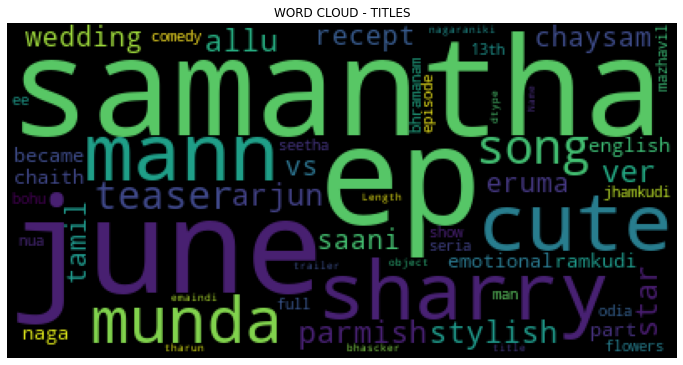

In [352]:
plt.figure(figsize=(12,12))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=120, max_words=1000, stopwords=stopwords, random_state=42).generate(str(df_ind['title']))
print(wordcloud)

plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

#### Word Cloud of Tags

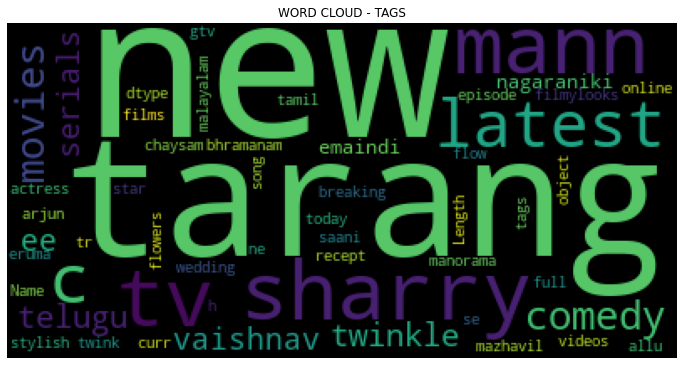

In [353]:
plt.figure(figsize=(12,12))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=120, max_words=1000, stopwords=stopwords, random_state=42).generate(str(df_ind['tags']))
print(wordcloud)

plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

#### Word Cloud of Description

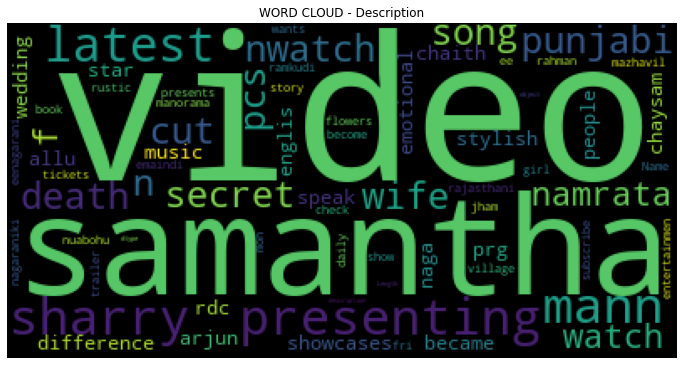

In [354]:
plt.figure(figsize=(12,12))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=120, max_words=1000, stopwords=stopwords, random_state=42).generate(str(df_ind['description']))
print(wordcloud)

plt.imshow(wordcloud)
plt.title("WORD CLOUD - Description")
plt.axis('off')
plt.show()

#### Word Cloud of Channel Title

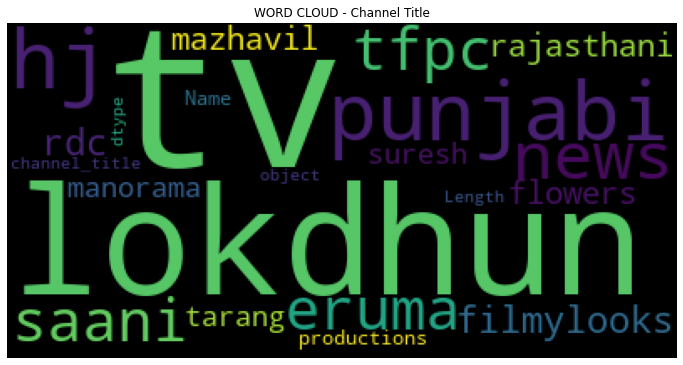

In [355]:
plt.figure(figsize=(12,12))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=120, max_words=1000, stopwords=stopwords, random_state=42).generate(str(df_ind['channel_title']))
print(wordcloud)

plt.imshow(wordcloud)
plt.title("WORD CLOUD - Channel Title")
plt.axis('off')
plt.show()

**If you like this analysis, please upvote at the top of this page.**